In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import torch
from torch import nn
import seaborn as sn

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cuda')

In [94]:
RANDOM_SEED = 23

In [95]:
from google.colab import files

uploaded = files.upload()


https://www.timeseriesclassification.com/description.php?Dataset=ECG5000

In [6]:
# data_train = arff.loadarff('./ECG5000/ECG5000_TRAIN.arff')
# data_test = arff.loadarff('./ECG5000/ECG5000_TEST.arff')
data_train = arff.loadarff('ECG5000_TRAIN.arff')
data_test = arff.loadarff('ECG5000_TEST.arff')
df = pd.concat([pd.DataFrame(data_train[0]), pd.DataFrame(data_test[0])], axis = 'index')

In [7]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1'
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1'
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1'
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1'
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,b'4'
4496,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,b'2'
4497,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,-0.733839,...,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,b'2'
4498,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,-0.938473,...,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568,b'2'


In [8]:
val_target = df.target.unique()

In [9]:
val_target

array([b'1', b'2', b'3', b'4', b'5'], dtype=object)

In [10]:
int(val_target[0].decode("utf-8"))

1

In [11]:
classes = ['N', 'RoT PVC', 'PVC', 'SP EB', 'UB']
def format_target_column(target, classes):
    int_target = int(target.decode("utf-8"))
    return classes[int_target-1]

In [12]:
df['target_formated'] = df['target'].apply(lambda x : format_target_column(x, classes))

In [13]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att133,att134,att135,att136,att137,att138,att139,att140,target,target_formated
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1',N
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1',N
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1',N
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1',N
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1',N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,b'4',SP EB
4496,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,b'2',RoT PVC
4497,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,-0.733839,...,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,b'2',RoT PVC
4498,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,-0.938473,...,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568,b'2',RoT PVC


In [14]:
df = df.sample(frac = 1)

In [15]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att133,att134,att135,att136,att137,att138,att139,att140,target,target_formated
2079,0.448327,-1.354912,-3.122151,-4.407543,-4.350894,-3.471880,-2.328329,-1.839765,-1.626847,-0.854695,...,1.537465,1.973847,2.227697,1.854069,1.307371,0.875288,1.205590,0.441640,b'1',N
132,-0.969664,-2.647500,-3.245684,-3.975309,-4.373184,-4.182035,-3.121424,-1.952989,-1.633493,-1.056533,...,1.300849,0.816569,0.298675,-0.445970,-1.032413,-0.941796,-0.154943,-0.667751,b'1',N
3894,-0.275401,-0.965036,-1.279743,-2.008236,-2.453288,-2.736874,-2.798648,-2.449010,-2.000485,-1.559434,...,-2.128281,-2.693169,-3.170589,-3.873365,-3.819214,-3.023421,-2.735716,-0.928757,b'2',RoT PVC
1874,-0.775445,-2.614895,-4.115610,-4.622444,-4.207771,-2.888119,-1.774888,-1.533421,-0.788128,-0.230558,...,0.716406,0.961776,0.797360,0.577462,0.701073,1.096033,1.377472,-0.083818,b'1',N
3926,-0.248881,-1.346474,-1.855199,-2.519039,-2.947360,-3.233288,-3.087431,-2.668242,-1.970671,-1.390033,...,-1.605818,-2.286109,-3.247334,-3.551343,-3.426098,-2.171479,-1.380595,-0.378163,b'2',RoT PVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,-0.704258,-1.769785,-1.220883,-2.127255,-2.076746,-1.999932,-2.373851,-2.233589,-2.216974,-2.292434,...,-1.785835,-2.147983,-2.015562,-2.587191,-2.410174,-2.152372,-3.417459,-0.062518,b'2',RoT PVC
75,1.922360,0.320326,-1.803277,-3.016993,-4.028803,-3.974369,-2.702564,-1.771554,-1.716248,-0.886257,...,0.286381,0.765305,0.961034,1.664030,1.866216,1.961709,1.108448,0.840241,b'1',N
1151,-2.168059,-4.146140,-4.117301,-4.216732,-3.834389,-3.046225,-1.688743,-1.265582,-1.019312,-0.338263,...,1.398050,1.607765,1.592225,1.281014,0.891932,0.578939,1.149655,0.218004,b'1',N
545,-1.036630,-0.586544,-3.202044,-5.001676,-4.574732,-4.052679,-2.680084,-1.812491,-1.110067,-0.174786,...,-0.671135,-0.296081,0.360343,0.307955,0.072506,-0.370814,0.151693,0.358463,b'1',N


In [16]:
list = df['target_formated'].value_counts()

Text(0, 0.5, 'Counter')

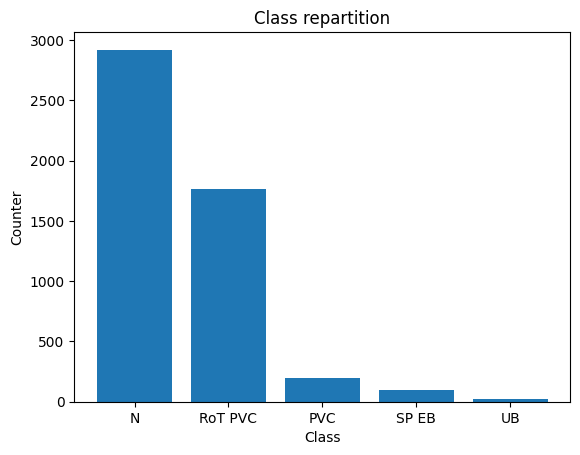

In [17]:
plt.bar(classes, list.values)
plt.title('Class repartition')
plt.xlabel('Class')
plt.ylabel('Counter')

In [18]:
df['Normal'] = df.target_formated.apply(lambda x: 1 if x=='N' else 0)

In [19]:
dff = df.drop(['target', 'target_formated', 'Normal'], axis='columns')

In [20]:
dff.mean(axis = 'index')

,0
att1,-0.262476
att2,-1.649511
att3,-2.492211
att4,-3.119443
att5,-3.167438
...,...
att136,-0.761043
att137,-0.834741
att138,-0.642263
att139,-0.487242


In [107]:
def plot_serie(data, class_name, window=10):
    mean = data.mean(axis='index')
    std = data.std(axis='index')
    mean_smooth = mean.rolling(window=window, center=True).mean()
    std_smooth = std.rolling(window=window, center=True).mean()
    plt.plot(mean_smooth, label='Mean (smoothed)', color='blue')
    plt.fill_between(range(data.shape[1]),
                     mean_smooth - std,
                     mean_smooth + std,
                     color='blue', alpha=0.2, label='Std (smoothed)')

    plt.title('Mean representation of ' + class_name)
    plt.legend()
    plt.xticks(np.linspace(0, len(mean), 5))

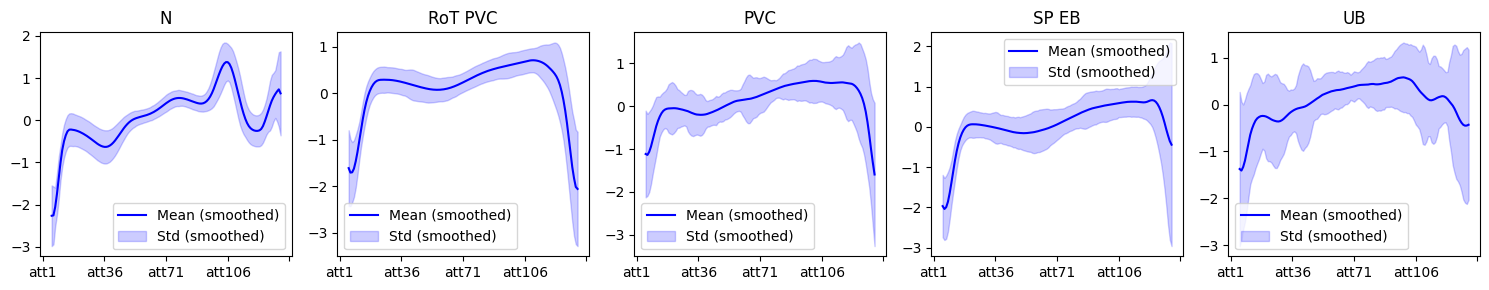

In [108]:
plt.figure(figsize=(15, 3))
for i, class_name in enumerate(classes):
    df_tmp = df[df.target_formated == class_name].drop(['target', 'target_formated', 'Normal'], axis='columns')
    plt.subplot(1, len(classes), i + 1)
    plot_serie(df_tmp, class_name)
    plt.title(class_name)

plt.tight_layout()
plt.show()

We observe that only the normal beats have a final pattern going up. We will try to build a model that can take that into account.

In [23]:
df_normal = df[df.Normal==1].drop(['target', 'target_formated', 'Normal'], axis='columns')
df_abnormal = df[df.Normal==0].drop(['target', 'target_formated', 'Normal'], axis='columns')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_df_tmp, test_df = train_test_split(df_normal, test_size=0.1, random_state=RANDOM_SEED)
train_df, val_df = train_test_split(train_df_tmp, test_size=0.1, random_state=RANDOM_SEED)

In [26]:
print(f'The train dataset contains {train_df.shape[0]} samples')
print(f'The test dataset contains {test_df.shape[0]} samples')
print(f'The validation dataset contains {val_df.shape[0]} samples')

The train dataset contains 2364 samples
The test dataset contains 292 samples
The validation dataset contains 263 samples


In [27]:
def create_dataset_from_df(df):
    sequences = df.values.tolist()
    dataset = [torch.tensor(seq).unsqueeze(1) for seq in sequences]
    n_seq, seq_len, n_features = torch.stack(dataset).shape
    return dataset, seq_len, n_features

In [28]:
train_dataset, seq_len, n_features = create_dataset_from_df(train_df)
test_dataset, seq_len, n_features = create_dataset_from_df(test_df)
val_dataset, seq_len, n_features = create_dataset_from_df(val_df)
abnormal_dataset, seq_len, n_features = create_dataset_from_df(df_abnormal)

In [29]:
print(type(train_dataset))
print(type(train_dataset[0]))
print(type(train_dataset[0][0]))
print(train_dataset[0][0])

<class 'list'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([-1.5072])


In [30]:
class LSTMencoder(nn.Module):
    def __init__(self, seq_len, n_features, neurons_latent_layer=128, batch_size=1):
        super().__init__()
        self.hidden_layer_size = 2*neurons_latent_layer
        self.num_layers = 1
        self.seq_len = seq_len
        self.n_features = n_features
        self.neurons_latent_layer = neurons_latent_layer
        self.batch_size = batch_size

        self.lstm1 = nn.LSTM(
            input_size= self.n_features,
            hidden_size= self.hidden_layer_size,
            num_layers= self.num_layers,
            batch_first=True
        )
        self.lstm2 = nn.LSTM(
            input_size= self.hidden_layer_size,
            hidden_size= self.neurons_latent_layer,
            num_layers= self.num_layers,
            batch_first=True
        )

    def forward(self, x):
        x = x.reshape((self.batch_size, self.seq_len, self.n_features))
        x, (h_n, c_n) = self.lstm1(x)
        x, (h_n, c_n) = self.lstm2(x)
        return h_n.reshape((self.batch_size, self.neurons_latent_layer))

class LSTMdecoder(nn.Module):
    def __init__(self, output_size, seq_len, n_features, neurons_latent_layer=128, batch_size=1):
        super().__init__()
        self.neurons_latent_layer = neurons_latent_layer
        self.hidden_layer_size = 2* neurons_latent_layer
        self.num_layers = 1
        self.output_size = output_size
        self.seq_len = seq_len
        self.n_features = n_features
        self.batch_size = batch_size

        self.latent = nn.LSTM(
            input_size = self.neurons_latent_layer,
            hidden_size = self.neurons_latent_layer,
            num_layers = self.num_layers,
            batch_first = True
        )
        self.lstm = nn.LSTM(
            input_size = self.neurons_latent_layer,
            hidden_size = self.hidden_layer_size,
            num_layers = self.num_layers,
            batch_first = True
        )
        self.dense = nn.Linear(self.hidden_layer_size, self.output_size)

    def forward(self, x):
        x = x.repeat(self.seq_len, 1)
        x = x.reshape((self.batch_size, self.seq_len, self.neurons_latent_layer))
        x, (h_n, c_n) = self.latent(x)
        x, (h_n, c_n) = self.lstm(x)
        x = self.dense(x)
        x = x.view(self.batch_size, self.seq_len, self.n_features)
        return x

class ADmodel(nn.Module):
    def __init__(self, seq_len, n_features, output_size=1, neurons_latent_layer=128, batch_size=1):
        super().__init__()
        self.seq_len = seq_len
        self.n_features = n_features
        self.neurons_latent_layer = neurons_latent_layer
        self.batch_size = batch_size
        self.output_size = output_size
        self.encoder = LSTMencoder(seq_len, n_features, neurons_latent_layer, batch_size)
        self.decoder = LSTMdecoder(output_size, seq_len, n_features, neurons_latent_layer, batch_size)

    def forward(self, x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x

In [34]:
model = ADmodel(seq_len = seq_len, n_features = n_features)
model = model.to(device)

In [35]:
def train_model(model, train_dataset, val_dataset, epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.L1Loss(reduction='sum')
    best_val_loss = float("inf")
    best_model = None

    mean_train_losses_per_epoch = []
    mean_val_losses_per_epoch = []
    for epoch in range(epochs):
        model = model.train()
        train_losses = []
        for sequence in train_dataset:
            sequence = sequence.to(device)
            optimizer.zero_grad()
            y_pred = model(sequence)
            y_pred = y_pred.view(sequence.size())
            loss = criterion(sequence, y_pred)
            train_losses.append(loss.item())
            loss.backward()
            optimizer.step()

        model = model.eval()
        val_losses = []
        with torch.no_grad():
            for sequence_val in val_dataset:
                sequence_val = sequence_val.to(device)
                y_val = model(sequence_val)
                y_val = y_val.view(sequence_val.size())
                loss_val = criterion(sequence_val, y_val)
                val_losses.append(loss_val.item())

        mean_train_losses_per_epoch.append(np.mean(train_losses))
        mean_val_losses_per_epoch.append(np.mean(val_losses))

        if np.mean(val_losses) < best_val_loss:
            best_val_loss = np.mean(val_losses)
            best_model = model.state_dict()
            torch.save(best_model, 'model.pth')


        print(f'Epoch {epoch}/{epochs} : Train loss = {np.mean(train_losses)} /// Val loss = {np.mean(val_losses)}')

    return model, mean_train_losses_per_epoch, mean_val_losses_per_epoch

In [36]:
model, train_losses, val_losses = train_model(model, train_dataset, val_dataset, 150)

Epoch 0/150 : Train loss = 65.98367540808096 /// Val loss = 54.22175480657657
Epoch 1/150 : Train loss = 55.60041133683748 /// Val loss = 50.954724257436546
Epoch 2/150 : Train loss = 52.01686708414817 /// Val loss = 51.437351908520604
Epoch 3/150 : Train loss = 50.383002069799225 /// Val loss = 46.04113200227571
Epoch 4/150 : Train loss = 37.0085605062204 /// Val loss = 32.44777751966121
Epoch 5/150 : Train loss = 31.10139564128495 /// Val loss = 29.800362438303438
Epoch 6/150 : Train loss = 29.124465297724793 /// Val loss = 28.326623760702038
Epoch 7/150 : Train loss = 27.129378464016213 /// Val loss = 27.703805085824015
Epoch 8/150 : Train loss = 30.540354085250957 /// Val loss = 38.40789411276466
Epoch 9/150 : Train loss = 35.85982956902428 /// Val loss = 30.84638960370546
Epoch 10/150 : Train loss = 30.4067971254565 /// Val loss = 27.298451282225635
Epoch 11/150 : Train loss = 26.516838206050764 /// Val loss = 25.530311928955776
Epoch 12/150 : Train loss = 25.533325178369047 /// V

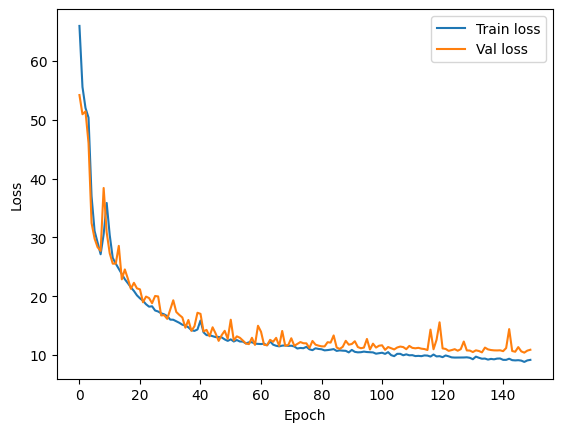

In [39]:
plt.plot(train_losses, label='Train loss')
plt.plot(val_losses, label='Val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss_curve.png')

In [40]:
from google.colab import files
files.download('model.pth')
files.download('loss_curve.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
model.load_state_dict(torch.load('model.pth', map_location=torch.device('cpu')))

<ipython-input-37-2abb86fb2638>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth', map_location=torch.device('cpu')))


<All keys matched successfully>

In [41]:
def predict(model, dataset):
  model = model.eval()
  criterion = nn.L1Loss(reduction='sum')
  losses = []
  predictions = []
  with torch.no_grad():
    for sequence in dataset:
      sequence = sequence.to(device)
      y_pred = model(sequence)
      y_pred = y_pred.view(sequence.size())
      predictions.append(y_pred)
      loss = criterion(sequence, y_pred)
      losses.append(loss.item())
  return predictions, losses

In [42]:
predictions_normal, loss_normal = predict(model, test_dataset)
predictions_abnormal, loss_abnormal = predict(model, abnormal_dataset)

Text(13.819444444444445, 0.5, 'Density')

<Figure size 2000x1000 with 0 Axes>

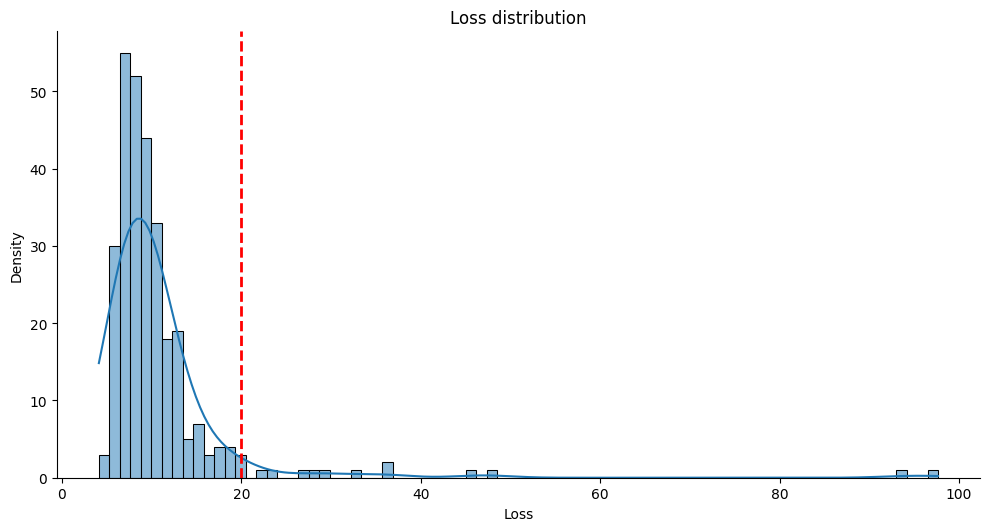

In [61]:
THRESHOLD = 20
plt.figure(figsize=(20,10))
sn.displot(loss_normal, kde=True, height=5, aspect=2)
plt.axvline(THRESHOLD, color='r', linestyle='dashed', linewidth=2)
plt.title('Loss distribution')
plt.xlabel('Loss')
plt.ylabel('Density')

In [62]:
tn = np.sum(np.array(loss_normal) < THRESHOLD)
fn = np.sum(np.array(loss_normal) > THRESHOLD)
tp = np.sum(np.array(loss_abnormal) > THRESHOLD)
fp = np.sum(np.array(loss_abnormal) < THRESHOLD)

Text(0.5, 36.72222222222221, 'True')

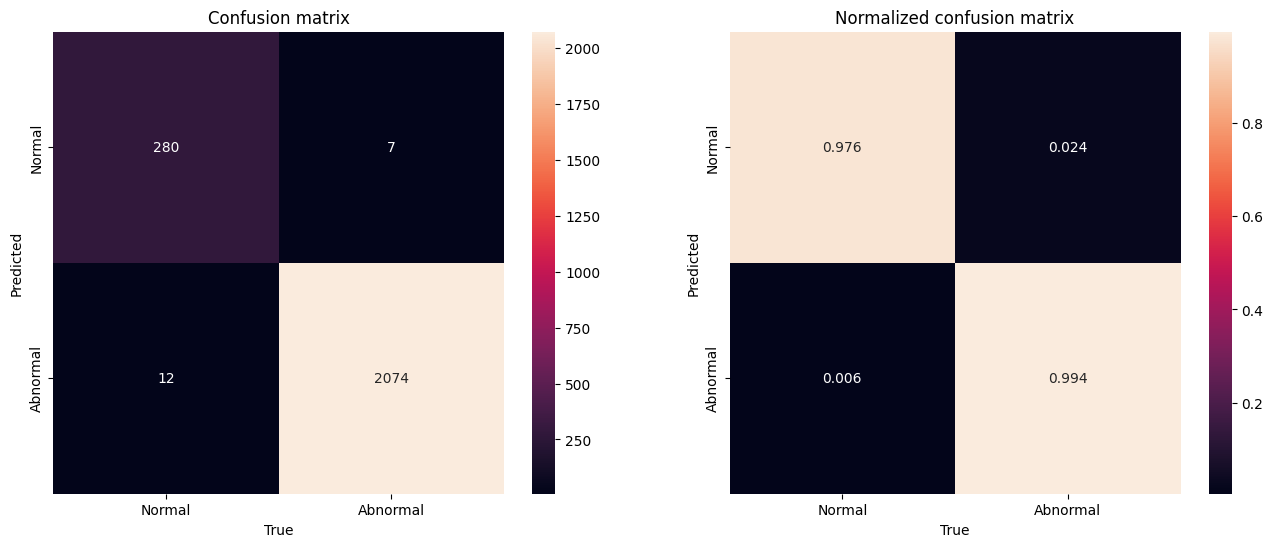

In [63]:
confusion_matrix = np.array([[tn, fp], [fn, tp]])
confusion_matrix_normalized = np.array([[tn, fp]/(tn+fp), [fn, tp]/(fn+tp)])
plt.figure(figsize=(16,6))
plt.subplot(1,2,1),
sn.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title('Confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('True')


plt.subplot(1,2,2),
sn.heatmap(confusion_matrix_normalized, annot=True, fmt='.3f', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title('Normalized confusion matrix')
plt.ylabel('Predicted')
plt.xlabel('True')



In [96]:
np.random.seed(RANDOM_SEED)

In [97]:
normal_sample = test_dataset[np.random.randint(0,292)]
abnormal_classes = ['RoT PVC','PVC','SP EB','UB']

df_random_samples = pd.DataFrame()
for class_name in abnormal_classes:
    df_tmp = df[df.target_formated==class_name].sample(1)
    df_random_samples = pd.concat([df_random_samples, df_tmp], axis='index')

In [98]:
random_samples, seq_len, n_features = create_dataset_from_df(df_random_samples.drop(['target', 'target_formated', 'Normal'], axis='columns'))

In [99]:
random_samples.append(normal_sample)

In [100]:
print(type(random_samples))
print(type(random_samples[0]))
print(type(random_samples[0][0]))
print(random_samples[0][0])

<class 'list'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([-0.6158])


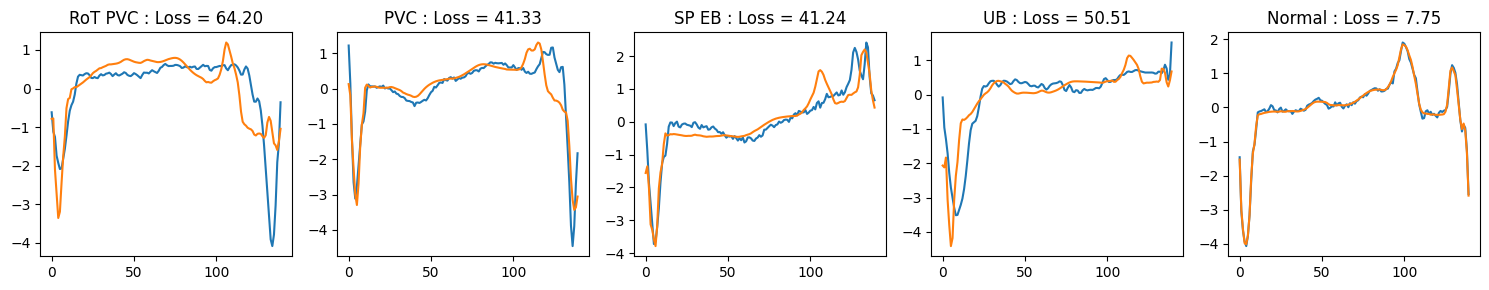

In [102]:
plt.figure(figsize=(15,3))
predictions, loss = predict(model, random_samples)
labels = abnormal_classes.copy()
labels.append('Normal')
for k, pred in enumerate(predictions):
    plt.subplot(1,5,k+1)
    plt.plot(random_samples[k])
    plt.plot(pred.detach().cpu().numpy())
    plt.title(f'{labels[k]} : Loss = {loss[k]:.2f}')
    plt.tight_layout()